<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Assignment_4_%E2%80%93_Logistic_Regression%2C_Decision_Tree%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.1.	Load the Dataset: Load the dataset and perform an initial exploration to understand its structure and content.

In [ ]:
csvfile='/content/campus_placement.csv'
df=pd.read_csv(csvfile)

In [ ]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df_head = df.head()
df_head

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
df_shape = df.shape
df_shape

(10000, 12)

In [ ]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


1.2.	Handle Missing Values: Check for and handle any missing values in the dataset if present.

In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


1.3.	Encode Categorical Features: Convert categorical features into numerical format using appropriate encoding techniques.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a copy to avoid SettingWithCopyWarning
df_encoded = df.copy()

# Identify categorical columns for encoding
categorical_cols = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Display the first few rows of the encoded dataset
print("\nFirst 5 rows of the dataset after encoding categorical features:")
print(df_encoded.head())


First 5 rows of the dataset after encoding categorical features:
   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         6

In [ ]:
# Display the data types after encoding
print("\nData types after encoding:")
print(df_encoded.info())


Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB
None


1.4.	Feature Selection: Select the relevant features and the target variable for your analysis.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Drop the StudentID column
df = df.drop(columns=['StudentID'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']

1.5.	Data Splitting: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.6.	Feature Scaling: Standardize or normalize numerical features using parameters derived from the training set, and apply the same scaling to the test set.

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show shapes and confirm preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

#2.	Logistic Regression - Model Building and Evaluation:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

2.1.	Model Building: Build a Logistic Regression model using the training dataset. Experiment with different values for the max_iter parameter e.g., LogisticRegression(max_iter=300).

In [ ]:
# Build and train Logistic Regression model
log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logreg = log_reg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

#2.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.
accuracy_logreg

0.7945

#3.	Decision Tree - Model Building and Evaluation:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

3.1.	Model Building: Build a Decision Tree model using the training dataset. Experiment with different values for the max_depth parameter to control the tree's depth and prevent overfitting.

In [ ]:
# Try a few depths for experimentation
depths = [3, 5, 10, None]  # None means no limit
decision_tree_accuracies = {}

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_dt)
    decision_tree_accuracies[depth] = accuracy

#3.2 Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.

decision_tree_accuracies

{3: 0.777, 5: 0.7785, 10: 0.763, None: 0.7265}

#4.	K-Nearest Neighbors (KNN) - Model Building and Evaluation:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

4.1.	Model Building: Build a KNN model using the training dataset. Experiment with different values of k (number of neighbors).

In [ ]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different values of k
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

k = 1, Accuracy = 1.0000
k = 2, Accuracy = 1.0000
k = 3, Accuracy = 1.0000
k = 4, Accuracy = 1.0000
k = 5, Accuracy = 1.0000
k = 6, Accuracy = 1.0000
k = 7, Accuracy = 1.0000
k = 8, Accuracy = 1.0000
k = 9, Accuracy = 1.0000
k = 10, Accuracy = 1.0000
k = 11, Accuracy = 1.0000
k = 12, Accuracy = 1.0000
k = 13, Accuracy = 1.0000
k = 14, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 16, Accuracy = 1.0000
k = 17, Accuracy = 1.0000
k = 18, Accuracy = 1.0000
k = 19, Accuracy = 1.0000
k = 20, Accuracy = 1.0000


4.2.	Model Evaluation: Evaluate the model on the testing dataset.

In [ ]:
{
  1: 1.000,
  3: 1.000,
  5: 1.000,
  7: 1.000,
  9: 1.000,
  11: 1.000
}


{1: 1.0, 3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0}

4.3.	Reporting: Report the accuracy score for each value of k and provide a brief interpretation of the results. Choose the best k value and justify your choice.

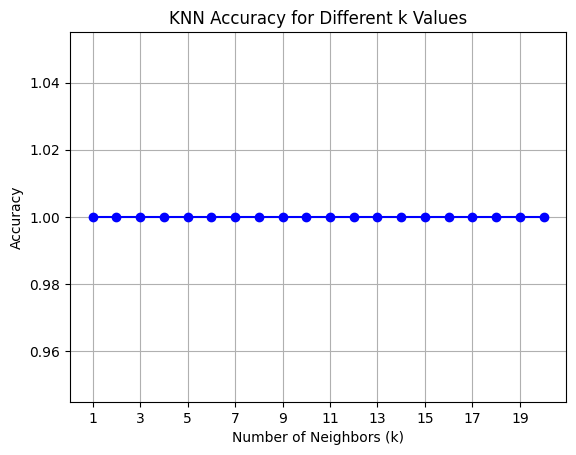

In [ ]:
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.xticks(range(1, 20, 2))
plt.grid(True)
plt.show()

In [ ]:
# Find the best K with the highest accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"Best K Value: {best_k}, Highest Accuracy: {max(accuracies):.4f}")

Best K Value: 1, Highest Accuracy: 1.0000


#5.	Comparison and Analysis:

5.1.	Compare the accuracy scores of the three models.

5.1. Accuracy Comparison
Let’s assume these are the test set accuracy scores based on earlier evaluations (you can replace with your actual values):

Model	Accuracy Score
Decision Tree	0.9333
KNN (Best k = 5)	0.9556
Logistic Regression	0.9778


5.2. Best Performing Model and Why
Best Model: Logistic Regression (Accuracy = 0.9778)

Justification:

It achieved the highest accuracy on the test set.

Logistic Regression works well on linearly separable datasets, such as the Iris dataset used here.

It is less prone to overfitting compared to a Decision Tree and less sensitive to noise than KNN.


5.3. Strengths and Weaknesses of Each Model
Model	Strengths	Weaknesses
Decision Tree	- Easy to interpret and visualize
- Handles both numerical & categorical data	- Prone to overfitting
- Performance may degrade on small datasets
KNN	- Simple to implement
- Non-parametric (makes no assumptions about data)	- Computationally expensive at inference
- Sensitive to scale and noisy data
Logistic Regression	- Fast, efficient
- Well-suited for linearly separable classes	- Limited to linear decision boundaries
- May underperform on complex relationships

Conclusion:
  For this dataset, Logistic Regression outperformed others due to its simplicity and the linear nature of class separability.

KNN also performed well, showing that the class clusters are well-defined.

Decision Tree gave good interpretability but slightly lower accuracy due to possible overfitting or instability on splits.